### SVM for Regression

Now we are predicting a continuous label.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
df = pd.read_csv('./data/concrete_slump.csv')

In [3]:
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82
...,...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17


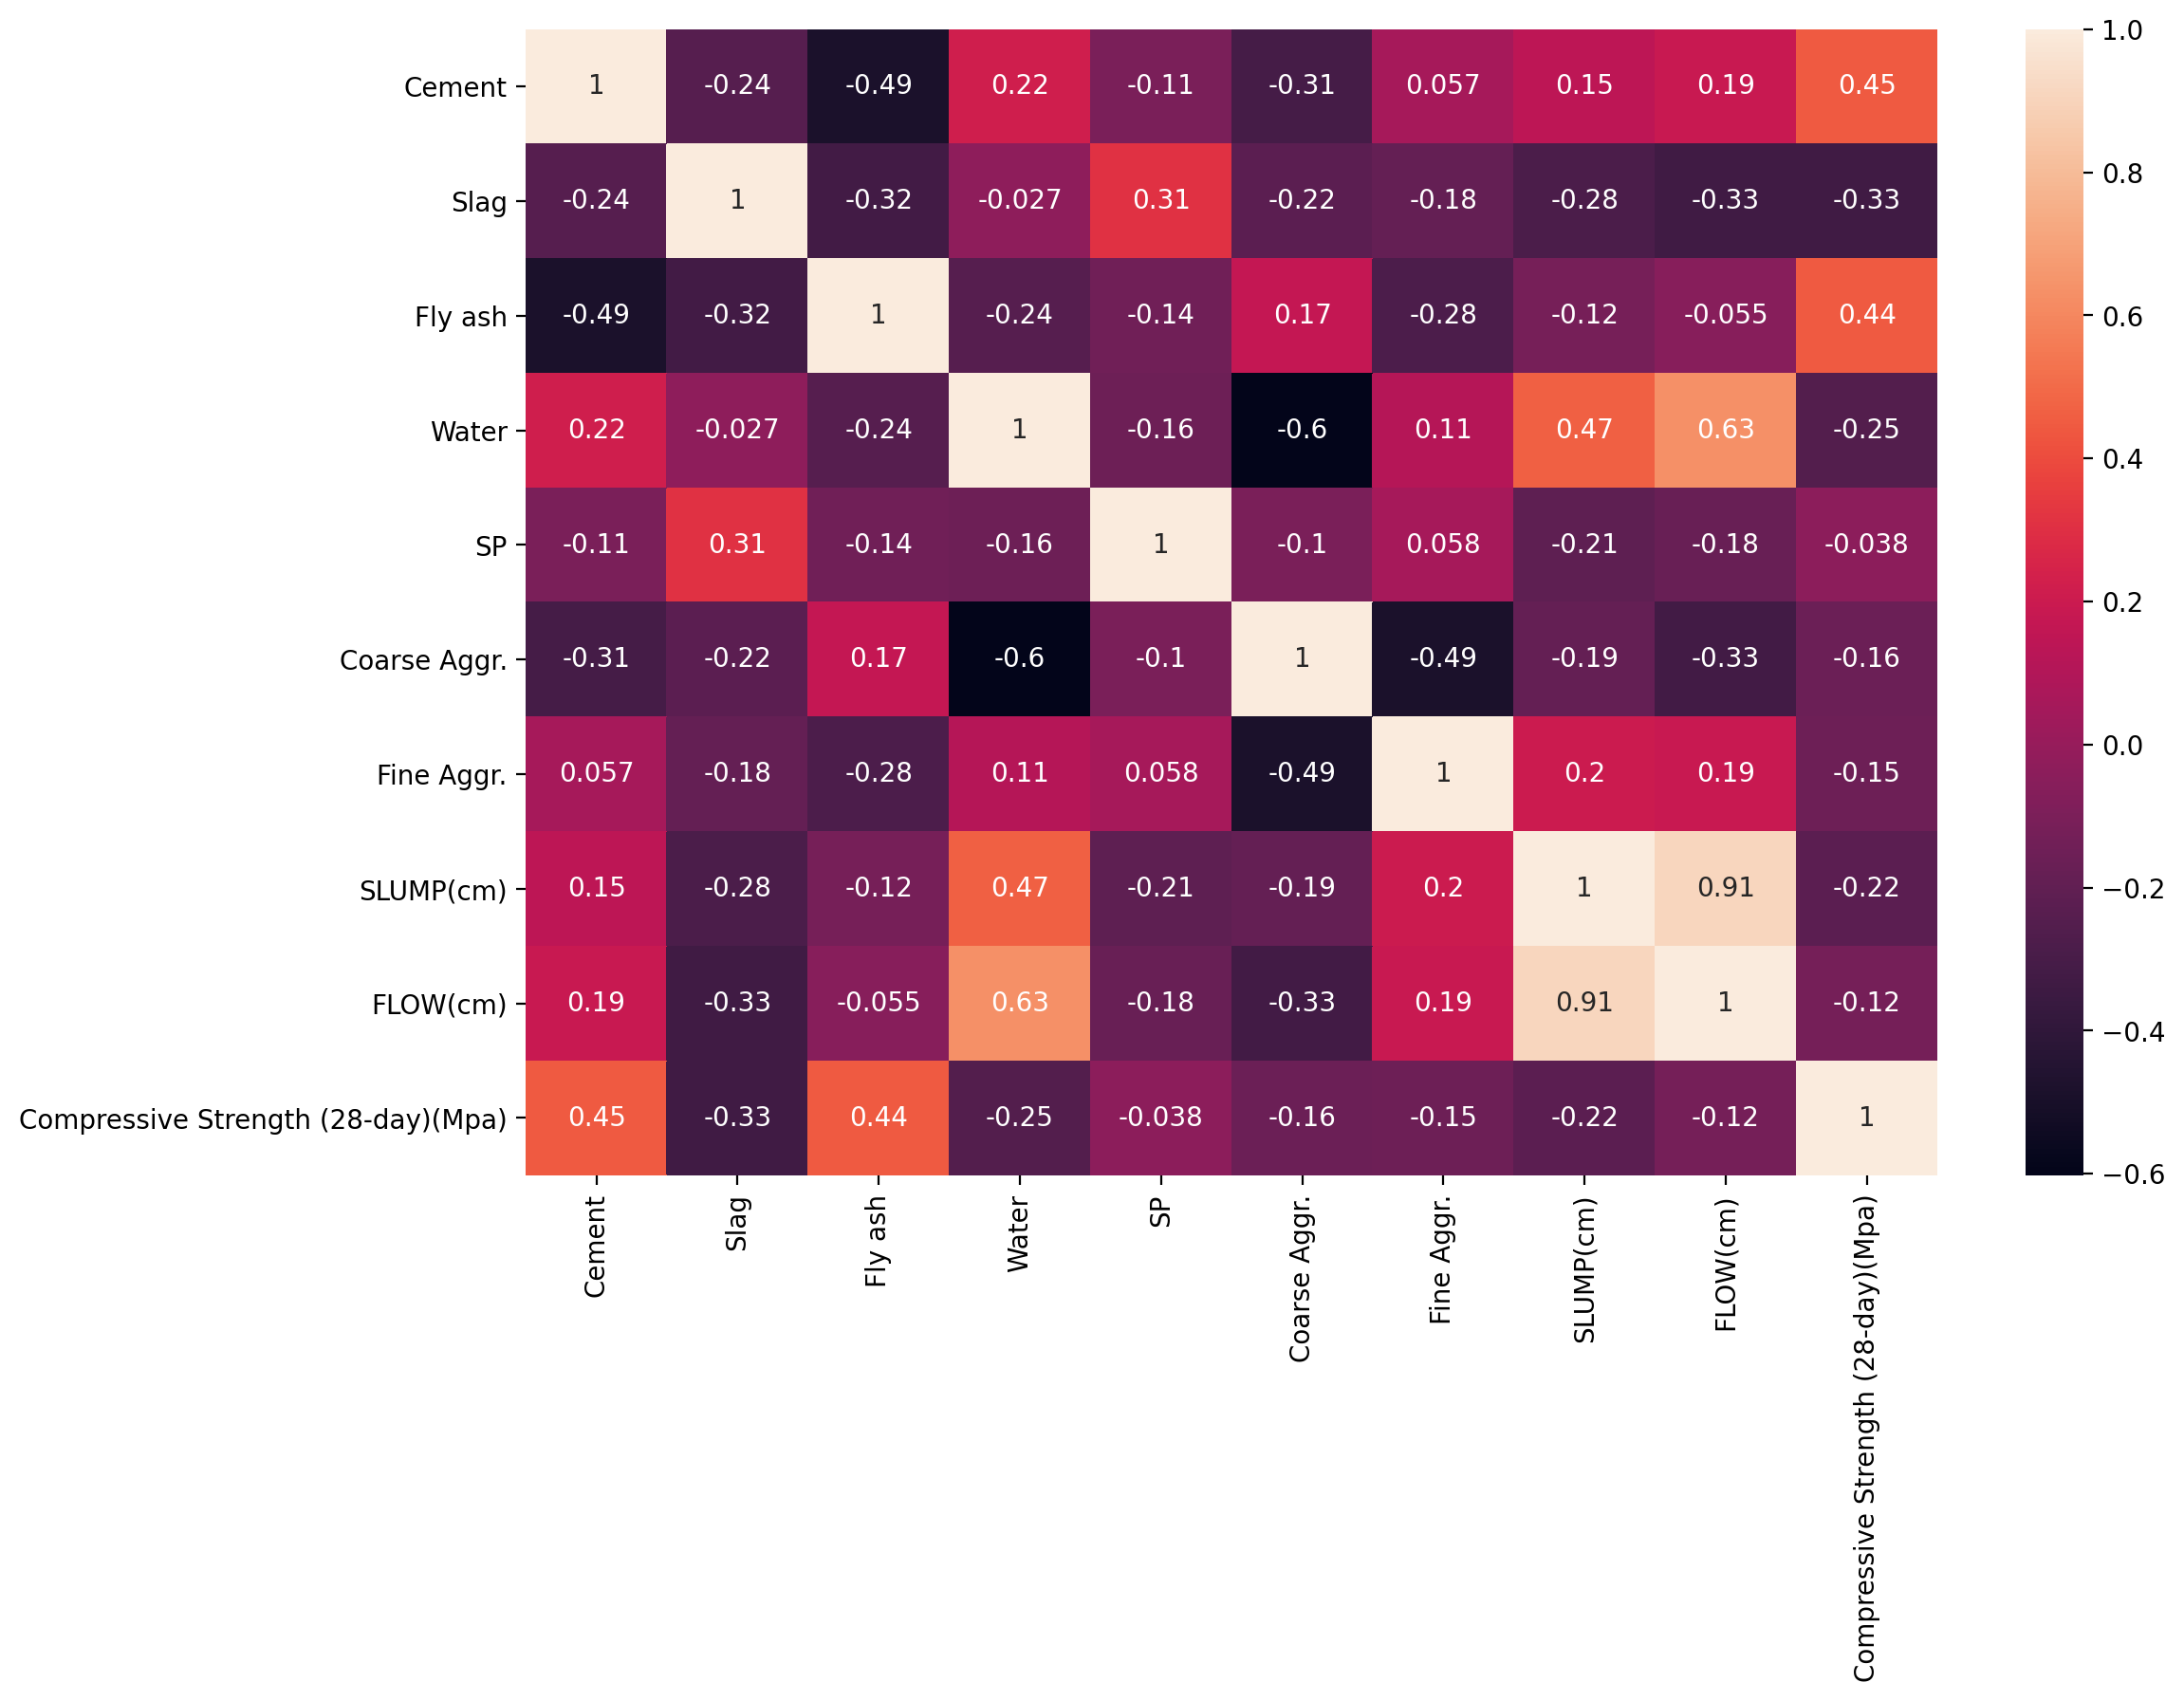

In [6]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df.corr(), annot=True);

In [7]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [8]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.svm import SVR, LinearSVR  # linear is faster, but it can only do linear kernel SVR

In [17]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [18]:
base_model = SVR()

In [19]:
base_model.fit(X_train, y_train)

SVR()

In [20]:
base_pred = base_model.predict(X_test)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
mae = mean_absolute_error(y_test, base_pred)
mae

5.236902091259179

In [24]:
rmse = np.sqrt(mean_squared_error(y_test, base_pred))
rmse

6.695914838327133

In [25]:
y_test.mean()

36.26870967741935

Can we do a grid search to improve on these error results?

In [26]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1.0],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto'],
              'degree': [2, 3, 4],
              'epsilon': [0, 0.01, 0.1, 0.5, 1.0, 2.0] }  # error you are willing to allow per training instance (see DOCS)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
svr = SVR()

In [29]:
grid = GridSearchCV(svr, param_grid)

In [30]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1.0], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1.0, 2.0],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [31]:
grid_pred = grid.predict(X_test)

In [32]:
mae = mean_absolute_error(y_test, grid_pred)
mae

2.512801221076198

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, grid_pred))
rmse

3.1782103051198347

**Always scale your data and perform the parameter grid search when you use SVM.**